
# Set up the notebook

In [1]:

%pprint

Pretty printing has been turned OFF


In [2]:

import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../py')

from stats_scraping_utils import StatsScrapingUtilities
from storage import Storage
import matplotlib.pyplot as plt
import textwrap
import seaborn as sns
import numpy as np
import re
from scipy.stats import pearsonr
%matplotlib inline

# Use the following only if you are on a high definition device
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

s = Storage()
ssu = StatsScrapingUtilities(s=s)


----


# Prepare the US States scatterplot

In [9]:

# https://en.wikipedia.org/wiki/Obesity_in_the_United_States
obesity_us_states_df = s.load_object('obesity_us_states_df')

# https://worldpopulationreview.com/state-rankings/income-inequality-by-state
income_inequality_us_states_df = s.load_object('income_inequality_us_states_df')


## Create the States scatterplot

In [22]:

# Explanatory variable
xname = 'gini_coefficient'

# Response variable
yname = 'adults_obesity_rate_2020'

# Remove NaNs
columns_list = ['state_name', xname, yname]
df = obesity_us_states_df.merge(income_inequality_us_states_df, on='state_name', how='inner')[columns_list].dropna()
xdata = df[xname]
ydata = df[yname]

In [11]:

df.sample(5)

,state_name,gini_coefficient,adults_obesity_rate_2020
47,West Virginia,46.209999,38.1
41,Tennessee,47.860001,32.8
10,Hawaii,43.689999,23.8
19,Maryland,45.130001,31.3
2,Arizona,46.820000,29.5


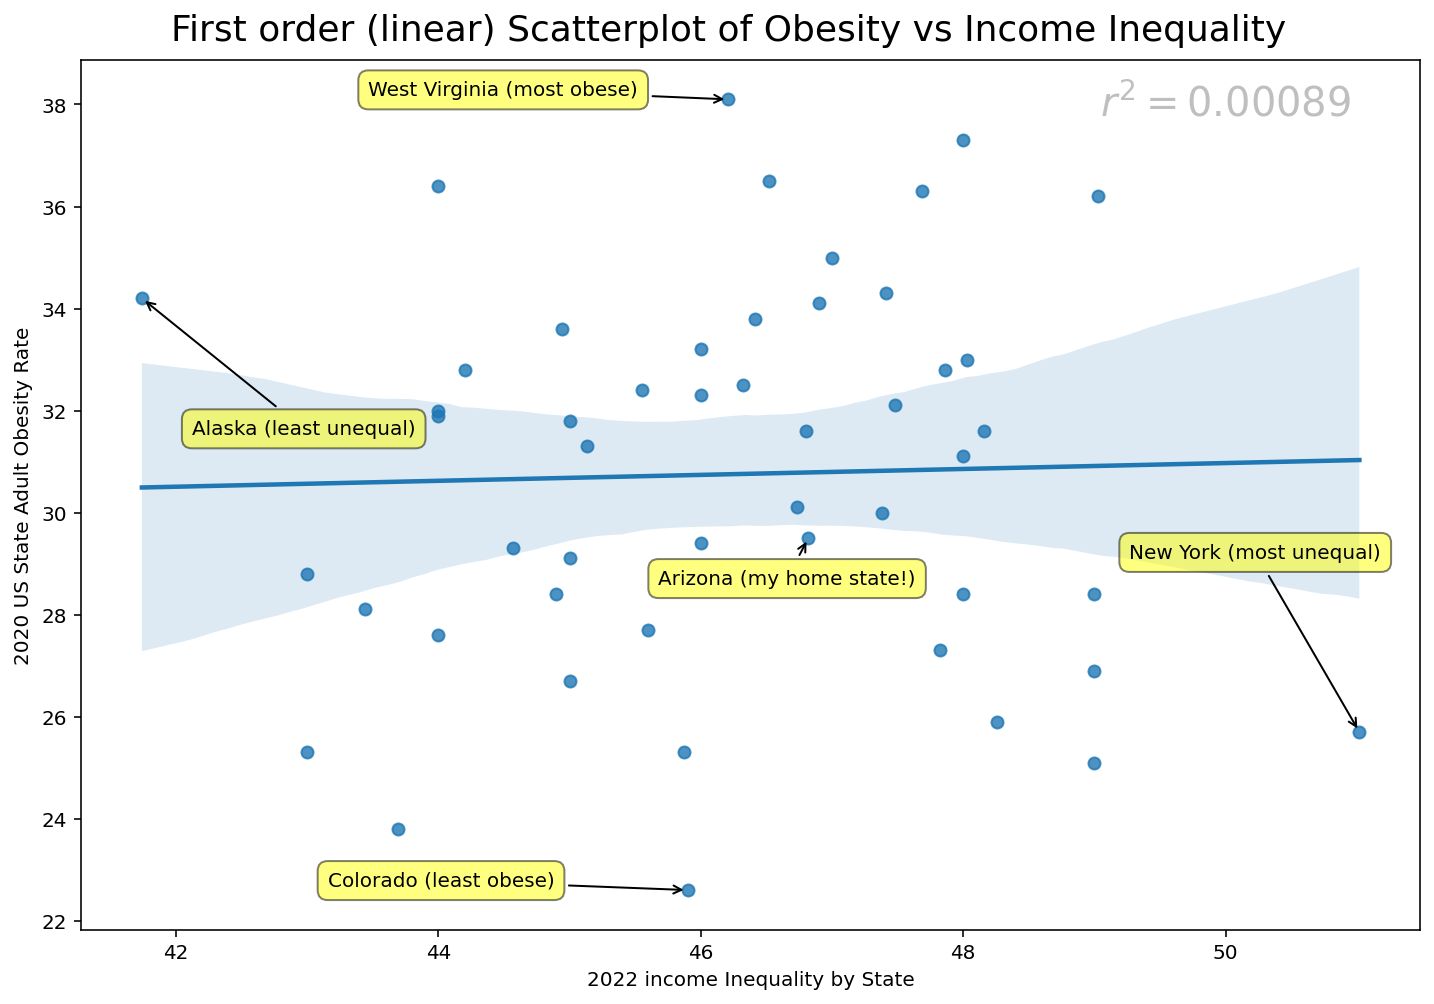

In [27]:

# First order (linear) scatterplot
fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x=xname, y=yname, scatter=True, data=df)
xlabel_str = '2022 income Inequality by State'
xlabel_text = plt.xlabel(xlabel_str)
ylabel_str = '2020 US State Adult Obesity Rate'
ylabel_text = plt.ylabel(ylabel_str)
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
least_unequal = xdata.min()
most_unequal = xdata.max()
most_obese = ydata.max()
least_obese = ydata.min()
for label, x, y in zip(df['state_name'], xdata, ydata):
    if (x == least_unequal):
        annotation = plt.annotate('{} (least unequal)'.format(label),
                                  xy=(x, y), xytext=(25, -70), **kwargs)
    elif (x == most_unequal):
        annotation = plt.annotate('{} (most unequal)'.format(label),
                                  xy=(x, y), xytext=(-115, 85), **kwargs)
    elif (y == most_obese):
        annotation = plt.annotate('{} (most obese)'.format(label),
                                  xy=(x, y), xytext=(-180, 0), **kwargs)
    elif (y == least_obese):
        annotation = plt.annotate('{} (least obese)'.format(label),
                                  xy=(x, y), xytext=(-180, 0), **kwargs)
    elif (label == 'Arizona'):
        annotation = plt.annotate('{} (my home state!)'.format(label),
                                  xy=(x, y), xytext=(-75, -25), **kwargs)

# Add r-squared
plt.text(50, 38, r'$r^2 = {0:.2}$'.format(pearsonr(xdata, ydata)[0] ** 2), fontsize=20, alpha=0.25,
         horizontalalignment='center', verticalalignment='center')

title_str = 'First order (linear) Scatterplot of Obesity vs Income Inequality'
title_obj = fig.suptitle(title_str, fontsize=18, y=0.92)